# Tasks
1. Remove the duplicates
2. Fix the skewnesses
3. Handle the outliers
3. Fix imbalanced data in "quality" column (binning)
4. Feature engineering

In [1]:
import pandas as pd

data = pd.read_csv("../data/winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Feature engineering

In [2]:
data["total_acidity"] = data["fixed acidity"] + data["volatile acidity"]
data["sugar_acidity_ratio"] = data["residual sugar"] / data["fixed acidity"]
data['sulfur_ratio'] = data['free sulfur dioxide'] / data['total sulfur dioxide']
data['alcohol_sugar_interaction'] = data['alcohol'] * data['residual sugar']
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,total_acidity,sugar_acidity_ratio,sulfur_ratio,alcohol_sugar_interaction
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,8.10,0.256757,0.323529,17.86
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,8.68,0.333333,0.373134,25.48
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,8.56,0.294872,0.277778,22.54
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,11.48,0.169643,0.283333,18.62
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,8.10,0.256757,0.323529,17.86


## Remove the duplicates

In [3]:
data = data.drop_duplicates()

In [4]:
data.duplicated().sum()

np.int64(0)

In [5]:
data.isna().sum()

fixed acidity                0
volatile acidity             0
citric acid                  0
residual sugar               0
chlorides                    0
free sulfur dioxide          0
total sulfur dioxide         0
density                      0
pH                           0
sulphates                    0
alcohol                      0
quality                      0
total_acidity                0
sugar_acidity_ratio          0
sulfur_ratio                 0
alcohol_sugar_interaction    0
dtype: int64

## Handle the outliers

In [6]:
q_cols = ["residual sugar", "chlorides", "sulphates"]

iqr_cols = [col for col in data.columns if col not in q_cols and col != "quality"]

# QUANTILE CAPPING
for col in q_cols:
    lower_limit = data[col].quantile(0.01)
    upper_limit = data[col].quantile(0.99)
    
    data.loc[data[col] < lower_limit, col] = lower_limit
    data.loc[data[col] > upper_limit, col] = upper_limit

# IQR CAPPING
for col in iqr_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    higher_bound = Q3 + 1.5 * IQR
    
    data.loc[data[col] < lower_bound, col] = lower_bound
    data.loc[data[col] > higher_bound, col] = higher_bound

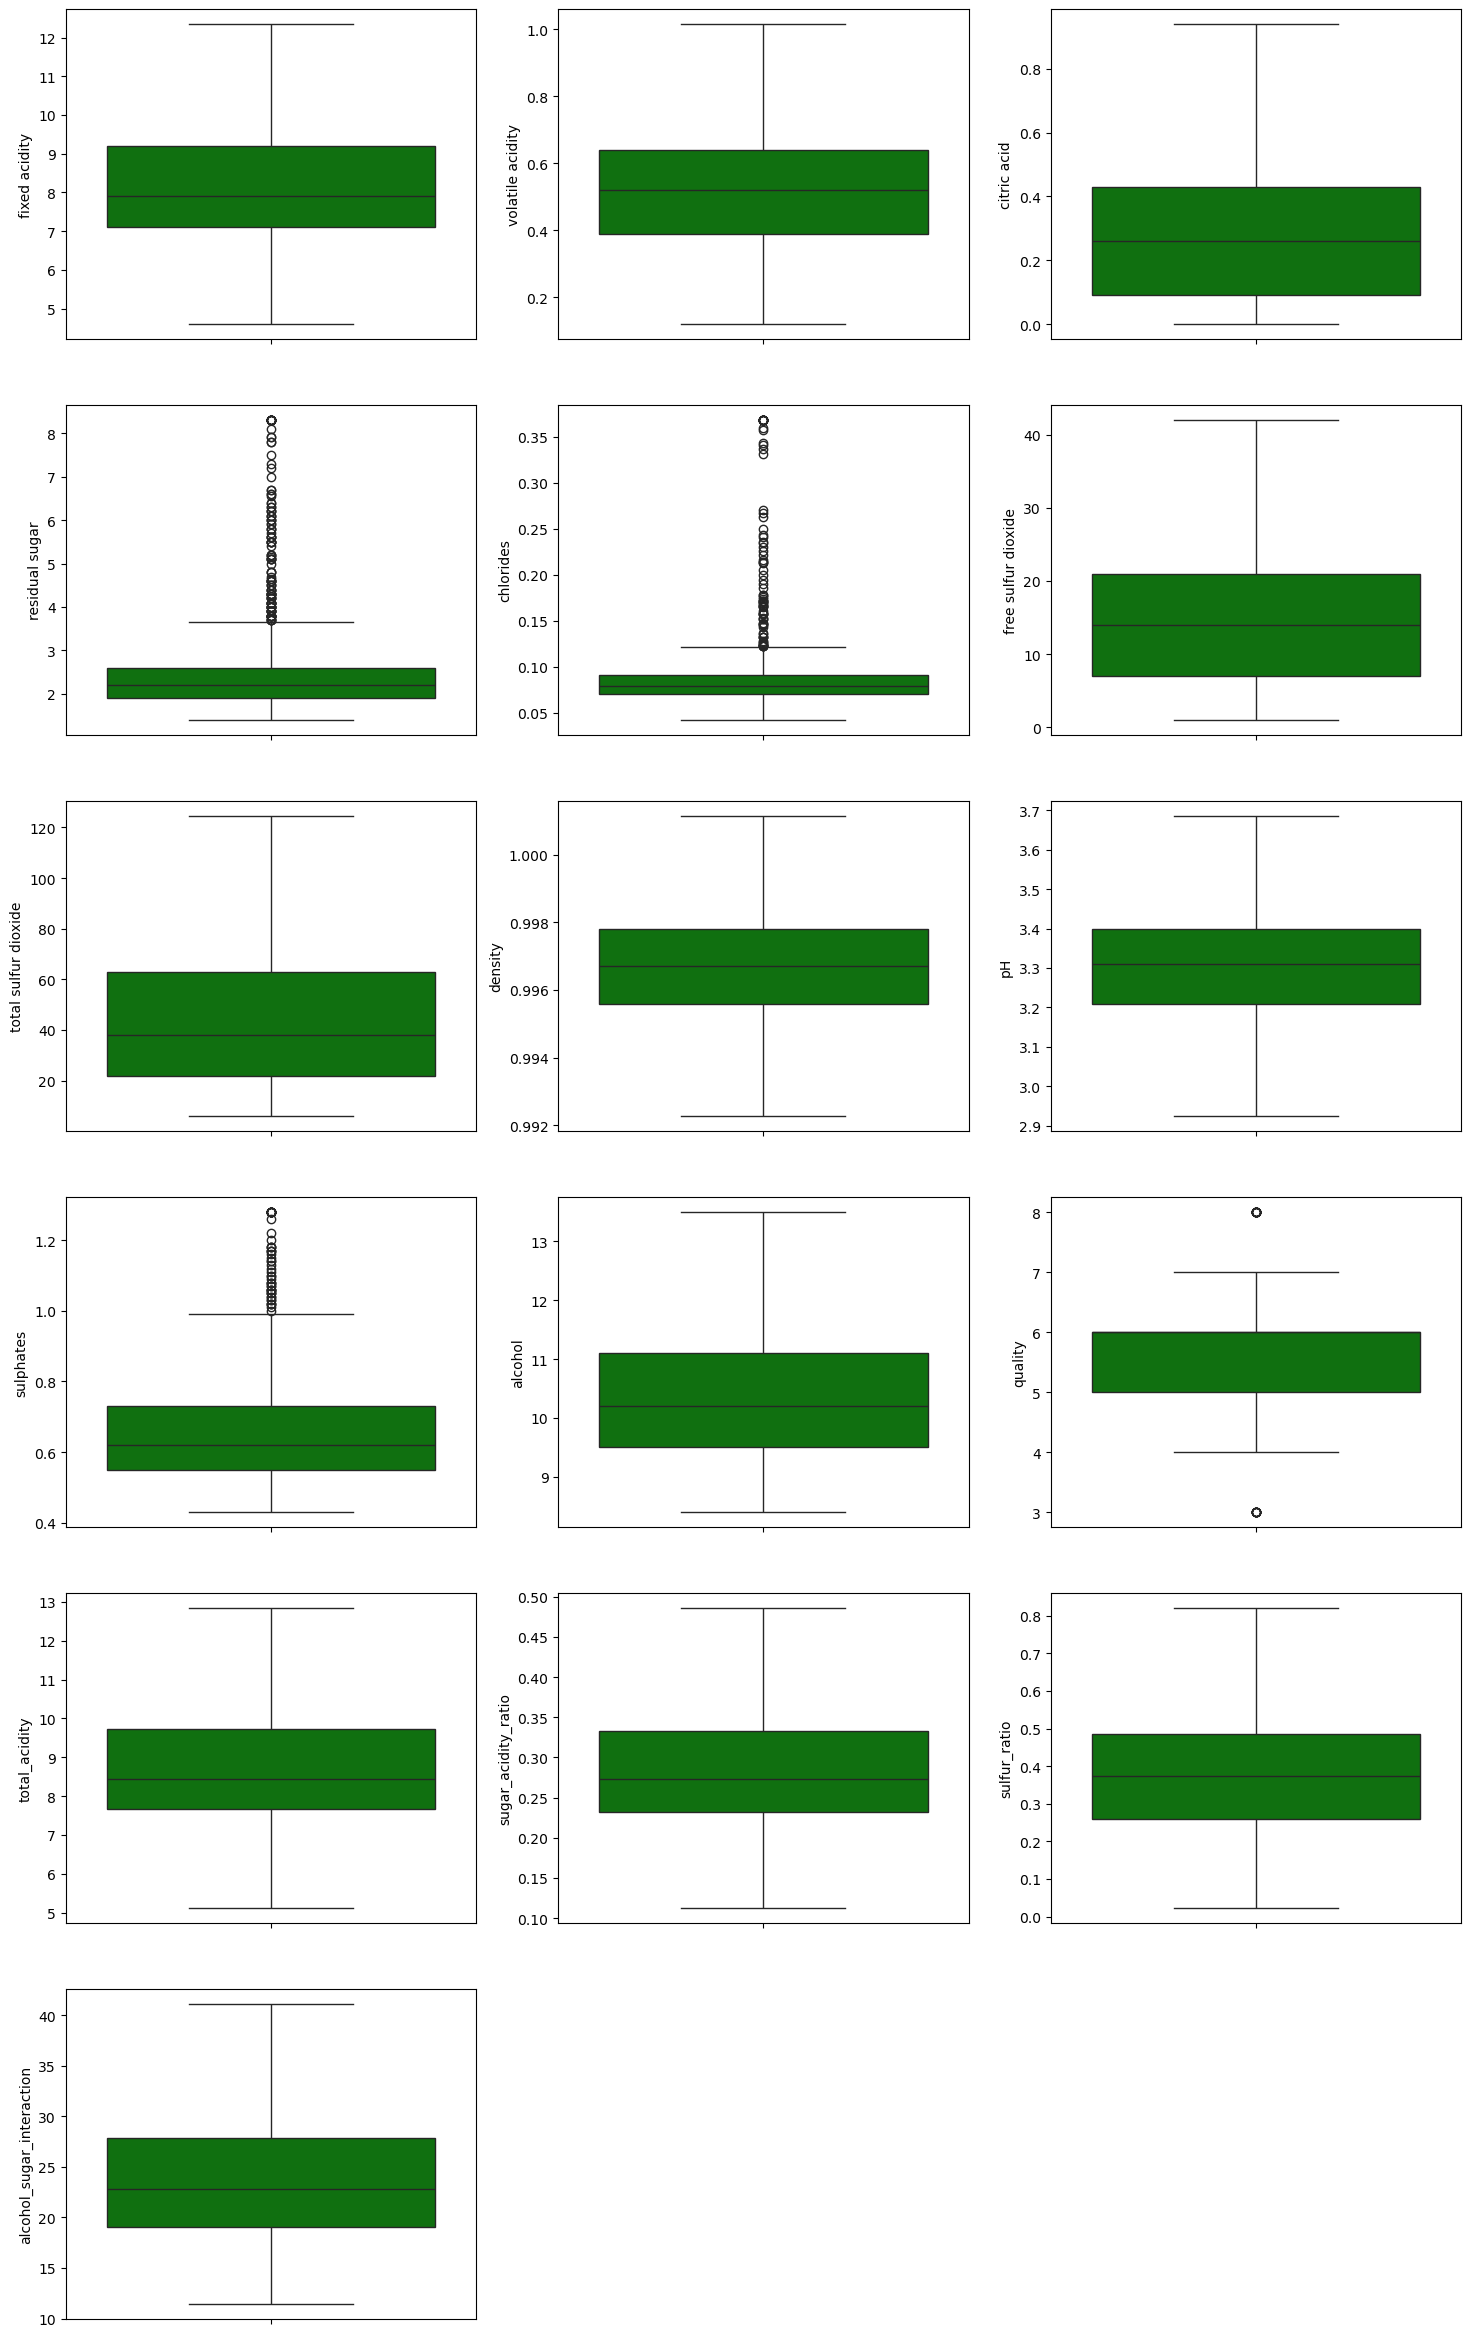

In [7]:
import seaborn as sns
import math
import matplotlib.pyplot as plt

cols = data.columns

number_cols = len(cols)
n_cols = 3
n_rows = math.ceil(number_cols / n_cols)

fig, axes = plt.subplots(ncols=n_cols, nrows=n_rows, figsize=(18, n_rows * 5))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.boxplot(y=col, data=data, ax=axes[i], color="green")
    
for j in range (i + 1, len(axes)):
    fig.delaxes(ax=axes[j])  

## Fixing the skewness

In [8]:
import numpy as np
import seaborn as sns

cols = data.columns.drop("quality")

skew_vals = data[cols].skew()
skew_limit = 0.75

skewed_cols = skew_vals[abs(skew_vals) > skew_limit].index.tolist()

for col in skewed_cols:
    data[col] = np.log1p(data[col])

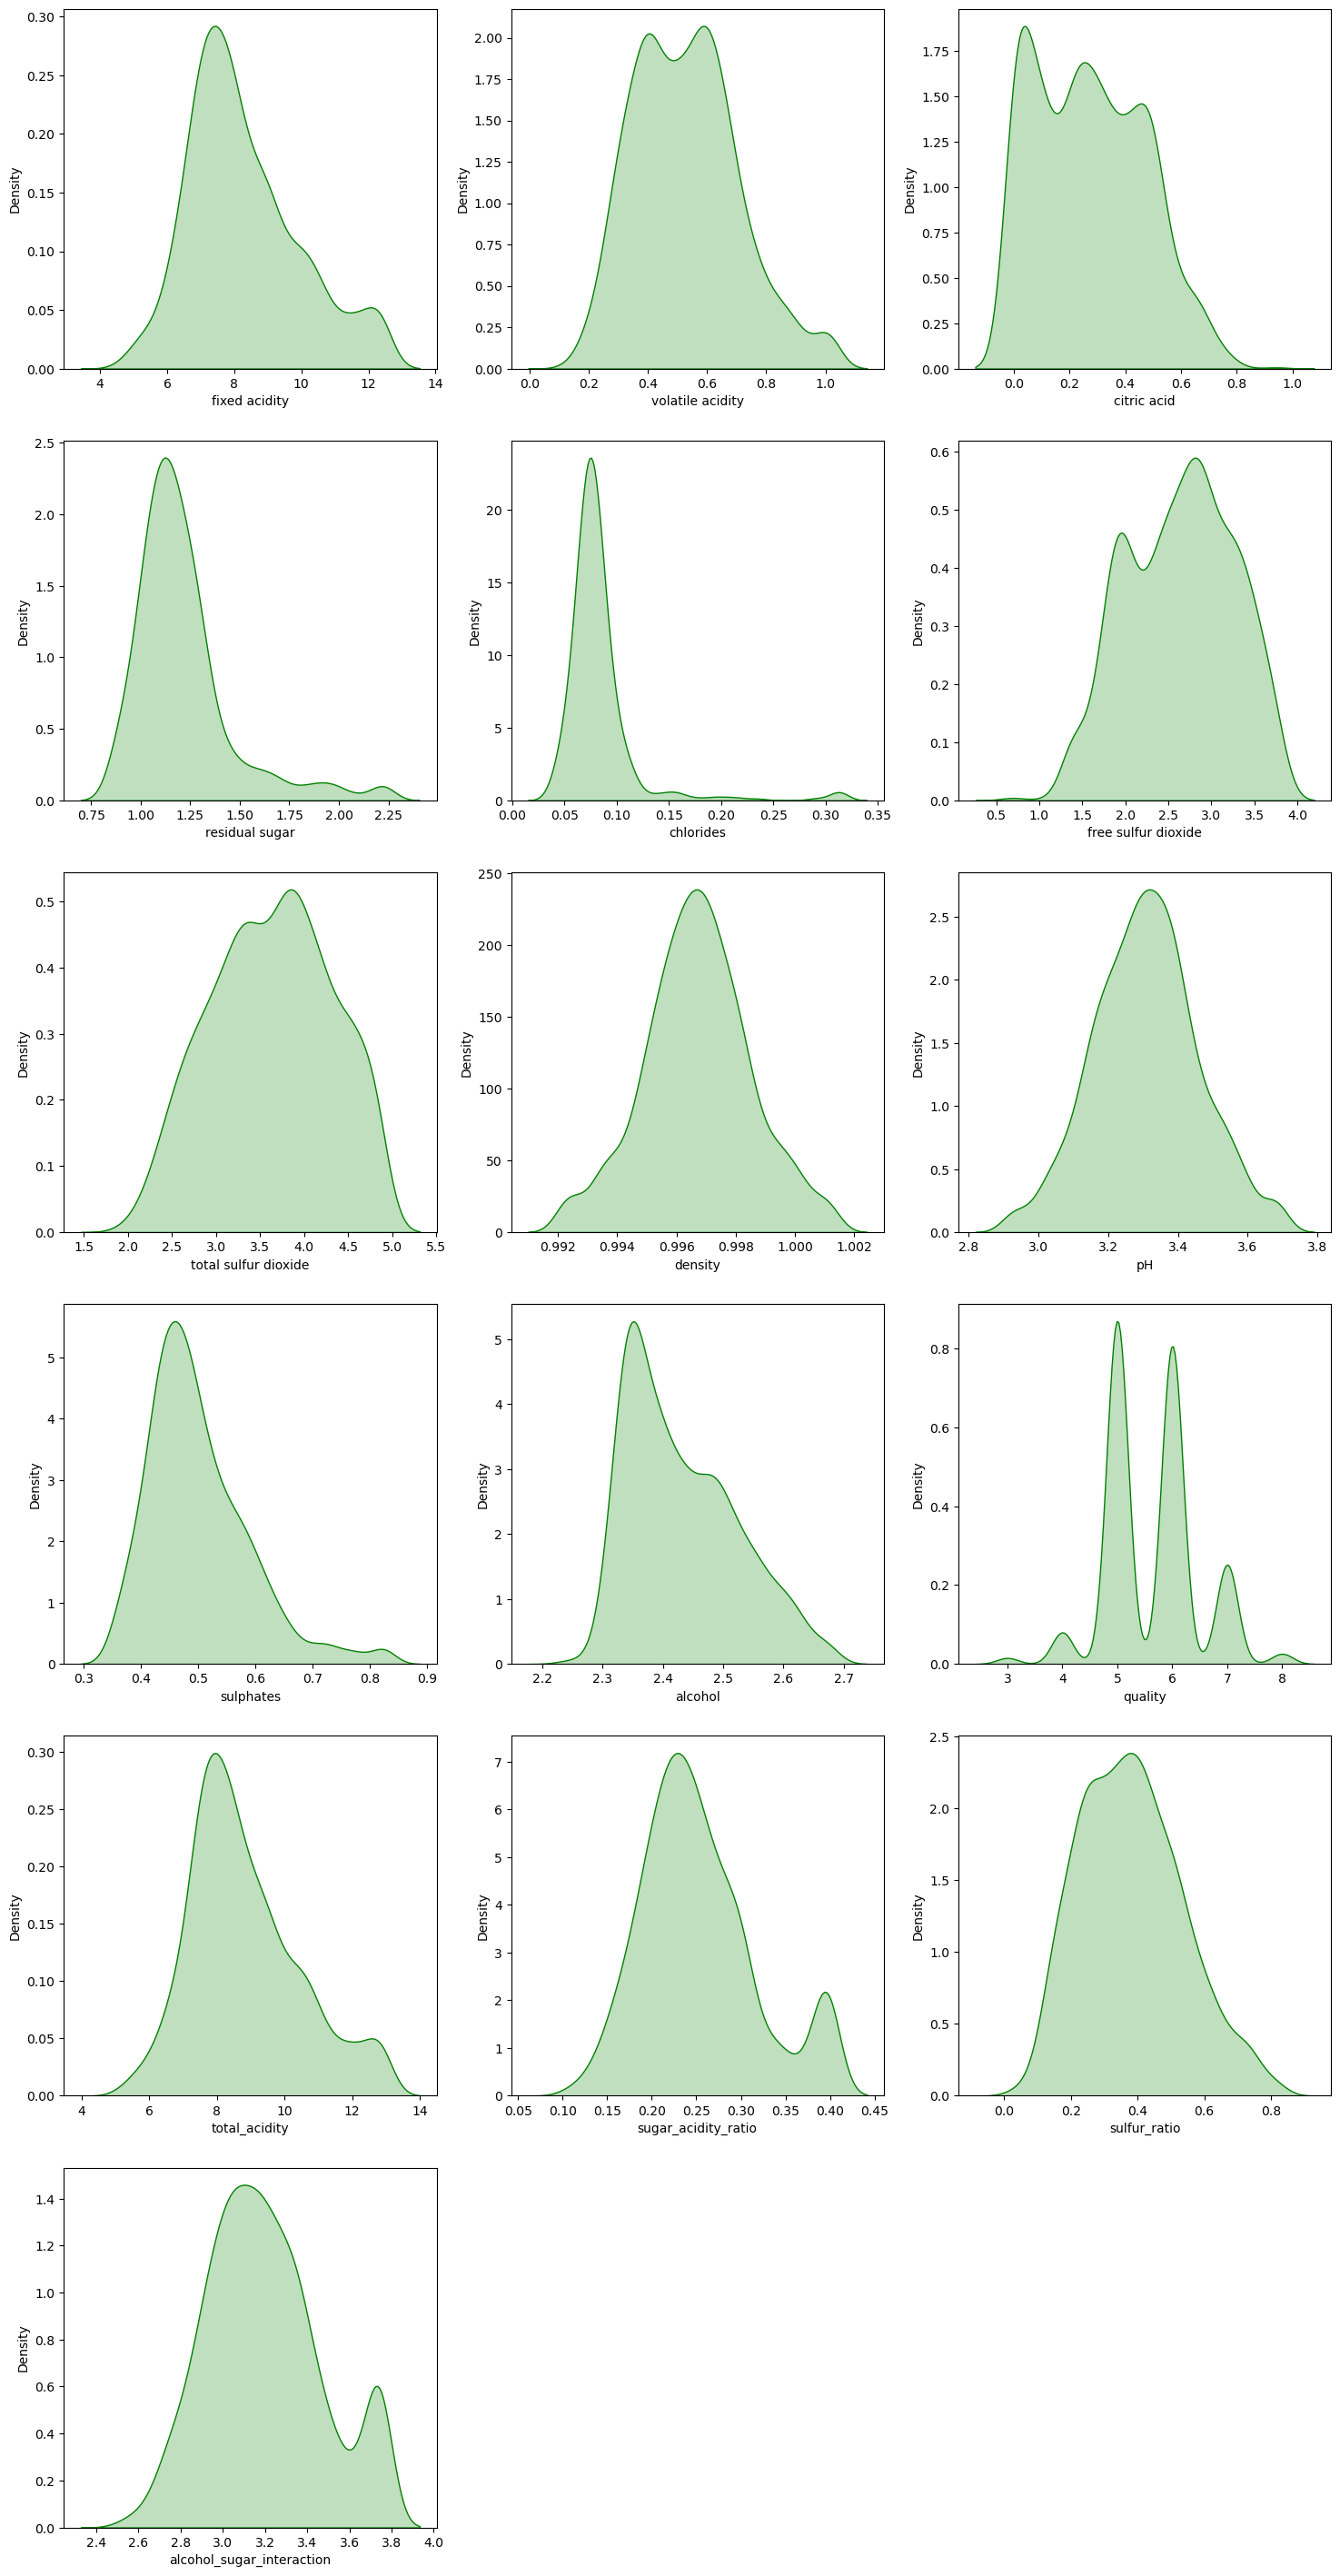

In [9]:
import math
import matplotlib.pyplot as plt

cols = data.columns

number_cols = len(cols)
n_cols = 3
n_rows = math.ceil(number_cols / n_cols)

fig, axes = plt.subplots(ncols=n_cols, nrows=n_rows, figsize=(18, n_rows * 6))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.kdeplot(x=col, data=data, ax=axes[i], color="green", fill=True)
    
for j in range (i + 1, len(axes)):
    fig.delaxes(ax=axes[j])  

## Fixing unbalanced data

In [10]:
bins = [0, 4, 6, 8]

data["quality_class"] = pd.cut(data["quality"], bins=bins, labels=[0, 1, 2])
data["quality_class"] = data["quality_class"].astype(int)
data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,total_acidity,sugar_acidity_ratio,sulfur_ratio,alcohol_sugar_interaction,quality_class
0,7.4,0.70,0.00,1.064711,0.073250,2.484907,3.555348,0.9978,3.51,0.444686,2.341806,5,8.10,0.228534,0.323529,2.937043,1
1,7.8,0.88,0.00,1.280934,0.093490,3.258097,4.219508,0.9968,3.20,0.518794,2.379546,5,8.68,0.287682,0.373134,3.276390,1
2,7.8,0.76,0.04,1.193922,0.088011,2.772589,4.007333,0.9970,3.26,0.500775,2.379546,5,8.56,0.258412,0.277778,3.158701,1
3,11.2,0.28,0.56,1.064711,0.072321,2.890372,4.110874,0.9980,3.16,0.457425,2.379546,6,11.48,0.156698,0.283333,2.976549,1
5,7.4,0.66,0.00,1.029619,0.072321,2.639057,3.713572,0.9978,3.51,0.444686,2.341806,5,8.06,0.217723,0.325000,2.885917,1


In [11]:
data.to_csv("preprocessed_data.csv", index=False)